In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from  tensorflow.keras.datasets import mnist

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '7'

In [4]:
data = mnist.load_data(path='mnist.npz')

In [5]:
x_data = data[0][0][:,:,:,np.newaxis]
y_data = data[0][1]
x_test = data[1][0][:,:,:,np.newaxis]
y_test = data[1][1]

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.33, random_state=42, stratify=y_data)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((40200, 28, 28, 1),
 (40200, 10),
 (19800, 28, 28, 1),
 (19800, 10),
 (10000, 28, 28, 1),
 (10000, 10))

In [7]:
y_list = np.unique(data[1][1])
y_list

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
input_shape = x_test[0].shape
output_size = y_list.shape[0]

In [9]:
def build_2d_cnn_custom_ch_32_DO(conv_num=1):
    input_layer = Input(shape=input_shape)
    x = input_layer

    for i in range(conv_num):
        x = Conv2D(kernel_size=3, filters=32*(2**(i//2)), strides=(1,1), padding='same')(x)
#         x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size=2, strides=(2,2), padding='same')(x)

    x = Flatten()(x)
  
    x = Dropout(0.5)(x)
    output_layer = Dense(output_size, activation='softmax')(x)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    
    return model

In [10]:
for i in range(1, 6):
    model = build_2d_cnn_custom_ch_32_DO(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dropout (Dropout)    

Train on 40200 samples, validate on 19800 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
40192/40200 [============================>.] - ETA: 0s - loss: 6.4962 - acc: 0.5537
Epoch 00001: val_loss improved from inf to 1.64379, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_1_conv_checkpoint/001-1.6438.hdf5
40200/40200 [==============================] - 6s 151us/sample - loss: 6.4955 - acc: 0.5537 - val_loss: 1.6438 - val_acc: 0.8726
Epoch 2/500
39616/40200 [============================>.] - ETA: 0s - loss: 2.2532 - acc: 0.8321
Epoch 00002: val_loss improved from 1.64379 to 1.17090, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_1_conv_checkpoint/002-1.1709.hdf5
40200/40200 [==============================] - 4s 105us/sample - loss: 2.2410 - acc: 0.8329 - val_loss: 1.1709 - val_acc: 0.9090
Epoch 3/500
40000/40200 [============================>.] - ETA: 0s - loss: 1.6320 - acc: 0.8768
Epoch 00003: val_loss improved from 1.17090 to

Epoch 22/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.1240 - acc: 0.9740
Epoch 00022: val_loss improved from 0.11413 to 0.10725, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_1_conv_checkpoint/022-0.1073.hdf5
40200/40200 [==============================] - 4s 98us/sample - loss: 0.1243 - acc: 0.9739 - val_loss: 0.1073 - val_acc: 0.9808
Epoch 23/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.1112 - acc: 0.9750
Epoch 00023: val_loss improved from 0.10725 to 0.10232, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_1_conv_checkpoint/023-0.1023.hdf5
40200/40200 [==============================] - 4s 102us/sample - loss: 0.1117 - acc: 0.9750 - val_loss: 0.1023 - val_acc: 0.9806
Epoch 24/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.1044 - acc: 0.9753
Epoch 00024: val_loss improved from 0.10232 to 0.09678, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_1_conv_checkpoi

Epoch 46/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0374 - acc: 0.9875
Epoch 00046: val_loss did not improve from 0.07230
40200/40200 [==============================] - 4s 100us/sample - loss: 0.0373 - acc: 0.9875 - val_loss: 0.0766 - val_acc: 0.9822
Epoch 47/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.0328 - acc: 0.9894
Epoch 00047: val_loss did not improve from 0.07230
40200/40200 [==============================] - 4s 103us/sample - loss: 0.0327 - acc: 0.9894 - val_loss: 0.0728 - val_acc: 0.9831
Epoch 48/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0331 - acc: 0.9895
Epoch 00048: val_loss improved from 0.07230 to 0.07221, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_1_conv_checkpoint/048-0.0722.hdf5
40200/40200 [==============================] - 4s 102us/sample - loss: 0.0331 - acc: 0.9895 - val_loss: 0.0722 - val_acc: 0.9828
Epoch 49/500
40128/40200 [============================>.] - ETA

Epoch 75/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0241 - acc: 0.9919
Epoch 00075: val_loss did not improve from 0.07092
40200/40200 [==============================] - 4s 101us/sample - loss: 0.0241 - acc: 0.9920 - val_loss: 0.0732 - val_acc: 0.9823
Epoch 76/500
39616/40200 [============================>.] - ETA: 0s - loss: 0.0249 - acc: 0.9918
Epoch 00076: val_loss did not improve from 0.07092
40200/40200 [==============================] - 4s 102us/sample - loss: 0.0248 - acc: 0.9919 - val_loss: 0.0765 - val_acc: 0.9825
Epoch 77/500
39616/40200 [============================>.] - ETA: 0s - loss: 0.0263 - acc: 0.9910
Epoch 00077: val_loss did not improve from 0.07092
40200/40200 [==============================] - 4s 103us/sample - loss: 0.0263 - acc: 0.9910 - val_loss: 0.0732 - val_acc: 0.9835
Epoch 78/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0250 - acc: 0.9912
Epoch 00078: val_loss did not improve from 0.07092
40200/40200 [========

Epoch 105/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0221 - acc: 0.9924
Epoch 00105: val_loss did not improve from 0.07092
40200/40200 [==============================] - 4s 104us/sample - loss: 0.0221 - acc: 0.9924 - val_loss: 0.0761 - val_acc: 0.9835
Epoch 106/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.0219 - acc: 0.9928
Epoch 00106: val_loss did not improve from 0.07092
40200/40200 [==============================] - 4s 101us/sample - loss: 0.0220 - acc: 0.9928 - val_loss: 0.0761 - val_acc: 0.9837
Epoch 107/500
39616/40200 [============================>.] - ETA: 0s - loss: 0.0216 - acc: 0.9922
Epoch 00107: val_loss did not improve from 0.07092
40200/40200 [==============================] - 4s 102us/sample - loss: 0.0216 - acc: 0.9922 - val_loss: 0.0784 - val_acc: 0.9831
Epoch 108/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.0215 - acc: 0.9929
Epoch 00108: val_loss did not improve from 0.07092
40200/40200 [====

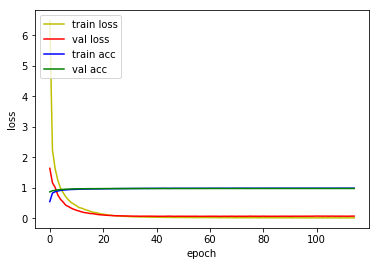

10000/10000 [==============================] - 1s 78us/sample - loss: 0.0674 - acc: 0.9837
Loss: 0.06743853561100914 Accuracy: 0.9837

Train on 40200 samples, validate on 19800 samples
Epoch 1/500
39872/40200 [============================>.] - ETA: 0s - loss: 7.1327 - acc: 0.4702
Epoch 00001: val_loss improved from inf to 0.90392, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_2_conv_checkpoint/001-0.9039.hdf5
40200/40200 [==============================] - 5s 129us/sample - loss: 7.0928 - acc: 0.4724 - val_loss: 0.9039 - val_acc: 0.8624
Epoch 2/500
39872/40200 [============================>.] - ETA: 0s - loss: 1.4070 - acc: 0.7634
Epoch 00002: val_loss improved from 0.90392 to 0.34181, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_2_conv_checkpoint/002-0.3418.hdf5
40200/40200 [==============================] - 5s 118us/sample - loss: 1.4007 - acc: 0.7640 - val_loss: 0.3418 - val_acc: 0.8994
Epoch 3/500
40064/40200 [============================>.

Epoch 23/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0723 - acc: 0.9778
Epoch 00023: val_loss did not improve from 0.05017
40200/40200 [==============================] - 5s 123us/sample - loss: 0.0726 - acc: 0.9777 - val_loss: 0.0532 - val_acc: 0.9839
Epoch 24/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0696 - acc: 0.9780
Epoch 00024: val_loss improved from 0.05017 to 0.04889, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_2_conv_checkpoint/024-0.0489.hdf5
40200/40200 [==============================] - 5s 119us/sample - loss: 0.0696 - acc: 0.9780 - val_loss: 0.0489 - val_acc: 0.9847
Epoch 25/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0647 - acc: 0.9786
Epoch 00025: val_loss did not improve from 0.04889
40200/40200 [==============================] - 5s 118us/sample - loss: 0.0646 - acc: 0.9786 - val_loss: 0.0495 - val_acc: 0.9853
Epoch 26/500
40000/40200 [============================>.] - ETA

Epoch 50/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0367 - acc: 0.9877
Epoch 00050: val_loss did not improve from 0.04202
40200/40200 [==============================] - 5s 124us/sample - loss: 0.0367 - acc: 0.9878 - val_loss: 0.0444 - val_acc: 0.9876
Epoch 51/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0385 - acc: 0.9874
Epoch 00051: val_loss did not improve from 0.04202
40200/40200 [==============================] - 4s 107us/sample - loss: 0.0385 - acc: 0.9874 - val_loss: 0.0432 - val_acc: 0.9877
Epoch 52/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0365 - acc: 0.9883
Epoch 00052: val_loss did not improve from 0.04202
40200/40200 [==============================] - 5s 115us/sample - loss: 0.0365 - acc: 0.9883 - val_loss: 0.0456 - val_acc: 0.9876
Epoch 53/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0371 - acc: 0.9875
Epoch 00053: val_loss did not improve from 0.04202
40200/40200 [========

39872/40200 [============================>.] - ETA: 0s - loss: 0.0271 - acc: 0.9911
Epoch 00078: val_loss did not improve from 0.04107
40200/40200 [==============================] - 5s 120us/sample - loss: 0.0272 - acc: 0.9911 - val_loss: 0.0446 - val_acc: 0.9884
Epoch 79/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0265 - acc: 0.9912
Epoch 00079: val_loss did not improve from 0.04107
40200/40200 [==============================] - 5s 119us/sample - loss: 0.0264 - acc: 0.9912 - val_loss: 0.0417 - val_acc: 0.9888
Epoch 80/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0260 - acc: 0.9910
Epoch 00080: val_loss did not improve from 0.04107
40200/40200 [==============================] - 5s 120us/sample - loss: 0.0260 - acc: 0.9910 - val_loss: 0.0440 - val_acc: 0.9878
Epoch 81/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0272 - acc: 0.9904
Epoch 00081: val_loss did not improve from 0.04107
40200/40200 [=====================

Epoch 108/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0217 - acc: 0.9922
Epoch 00108: val_loss did not improve from 0.04107
40200/40200 [==============================] - 5s 119us/sample - loss: 0.0218 - acc: 0.9921 - val_loss: 0.0432 - val_acc: 0.9888
Epoch 109/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.0217 - acc: 0.9924
Epoch 00109: val_loss did not improve from 0.04107
40200/40200 [==============================] - 5s 119us/sample - loss: 0.0218 - acc: 0.9924 - val_loss: 0.0437 - val_acc: 0.9890
Epoch 110/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.0226 - acc: 0.9922
Epoch 00110: val_loss did not improve from 0.04107
40200/40200 [==============================] - 5s 122us/sample - loss: 0.0227 - acc: 0.9921 - val_loss: 0.0438 - val_acc: 0.9891
Epoch 111/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0216 - acc: 0.9923
Epoch 00111: val_loss did not improve from 0.04107
40200/40200 [====

39744/40200 [============================>.] - ETA: 0s - loss: 0.0195 - acc: 0.9927
Epoch 00137: val_loss did not improve from 0.04089
40200/40200 [==============================] - 5s 118us/sample - loss: 0.0195 - acc: 0.9927 - val_loss: 0.0444 - val_acc: 0.9893
Epoch 138/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0190 - acc: 0.9938
Epoch 00138: val_loss did not improve from 0.04089
40200/40200 [==============================] - 5s 118us/sample - loss: 0.0191 - acc: 0.9938 - val_loss: 0.0470 - val_acc: 0.9885
Epoch 139/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.0184 - acc: 0.9935
Epoch 00139: val_loss did not improve from 0.04089
40200/40200 [==============================] - 5s 116us/sample - loss: 0.0186 - acc: 0.9935 - val_loss: 0.0460 - val_acc: 0.9892
Epoch 140/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0180 - acc: 0.9937
Epoch 00140: val_loss did not improve from 0.04089
40200/40200 [==================

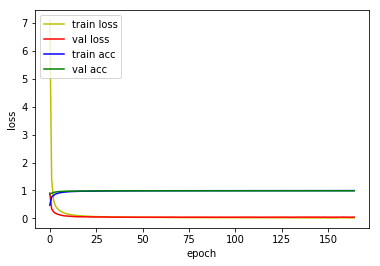

10000/10000 [==============================] - 1s 90us/sample - loss: 0.0343 - acc: 0.9891
Loss: 0.034315878265905396 Accuracy: 0.9891

Train on 40200 samples, validate on 19800 samples
Epoch 1/500
40192/40200 [============================>.] - ETA: 0s - loss: 3.3498 - acc: 0.5511
Epoch 00001: val_loss improved from inf to 0.32809, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_3_conv_checkpoint/001-0.3281.hdf5
40200/40200 [==============================] - 6s 161us/sample - loss: 3.3494 - acc: 0.5511 - val_loss: 0.3281 - val_acc: 0.8973
Epoch 2/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.4957 - acc: 0.8423
Epoch 00002: val_loss improved from 0.32809 to 0.18597, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_3_conv_checkpoint/002-0.1860.hdf5
40200/40200 [==============================] - 6s 143us/sample - loss: 0.4956 - acc: 0.8424 - val_loss: 0.1860 - val_acc: 0.9411
Epoch 3/500
39936/40200 [============================>

39808/40200 [============================>.] - ETA: 0s - loss: 0.0359 - acc: 0.9881
Epoch 00023: val_loss did not improve from 0.04027
40200/40200 [==============================] - 5s 134us/sample - loss: 0.0358 - acc: 0.9881 - val_loss: 0.0430 - val_acc: 0.9868
Epoch 24/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0328 - acc: 0.9889
Epoch 00024: val_loss improved from 0.04027 to 0.04011, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_3_conv_checkpoint/024-0.0401.hdf5
40200/40200 [==============================] - 6s 137us/sample - loss: 0.0327 - acc: 0.9889 - val_loss: 0.0401 - val_acc: 0.9879
Epoch 25/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0323 - acc: 0.9892
Epoch 00025: val_loss improved from 0.04011 to 0.03724, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_3_conv_checkpoint/025-0.0372.hdf5
40200/40200 [==============================] - 5s 136us/sample - loss: 0.0323 - acc: 0.9892 - val_l

39872/40200 [============================>.] - ETA: 0s - loss: 0.0148 - acc: 0.9952
Epoch 00050: val_loss did not improve from 0.03580
40200/40200 [==============================] - 6s 137us/sample - loss: 0.0147 - acc: 0.9952 - val_loss: 0.0391 - val_acc: 0.9893
Epoch 51/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0144 - acc: 0.9952
Epoch 00051: val_loss did not improve from 0.03580
40200/40200 [==============================] - 6s 140us/sample - loss: 0.0143 - acc: 0.9952 - val_loss: 0.0376 - val_acc: 0.9897
Epoch 52/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0127 - acc: 0.9955
Epoch 00052: val_loss did not improve from 0.03580
40200/40200 [==============================] - 6s 138us/sample - loss: 0.0127 - acc: 0.9955 - val_loss: 0.0382 - val_acc: 0.9900
Epoch 53/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0125 - acc: 0.9957
Epoch 00053: val_loss did not improve from 0.03580
40200/40200 [=====================

Epoch 79/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0089 - acc: 0.9970
Epoch 00079: val_loss did not improve from 0.03536
40200/40200 [==============================] - 6s 143us/sample - loss: 0.0089 - acc: 0.9970 - val_loss: 0.0381 - val_acc: 0.9912
Epoch 80/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0078 - acc: 0.9975
Epoch 00080: val_loss did not improve from 0.03536
40200/40200 [==============================] - 6s 139us/sample - loss: 0.0078 - acc: 0.9975 - val_loss: 0.0373 - val_acc: 0.9914
Epoch 81/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0078 - acc: 0.9974
Epoch 00081: val_loss did not improve from 0.03536
40200/40200 [==============================] - 6s 139us/sample - loss: 0.0078 - acc: 0.9974 - val_loss: 0.0385 - val_acc: 0.9907
Epoch 82/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0107 - acc: 0.9964
Epoch 00082: val_loss did not improve from 0.03536
40200/40200 [========

Epoch 109/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.9984
Epoch 00109: val_loss did not improve from 0.03536
40200/40200 [==============================] - 6s 145us/sample - loss: 0.0053 - acc: 0.9984 - val_loss: 0.0404 - val_acc: 0.9913
Epoch 110/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0069 - acc: 0.9976
Epoch 00110: val_loss did not improve from 0.03536
40200/40200 [==============================] - 5s 136us/sample - loss: 0.0069 - acc: 0.9976 - val_loss: 0.0408 - val_acc: 0.9905
Epoch 111/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0062 - acc: 0.9979
Epoch 00111: val_loss did not improve from 0.03536
40200/40200 [==============================] - 5s 127us/sample - loss: 0.0062 - acc: 0.9979 - val_loss: 0.0410 - val_acc: 0.9912
Epoch 112/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0064 - acc: 0.9978
Epoch 00112: val_loss did not improve from 0.03536
40200/40200 [====

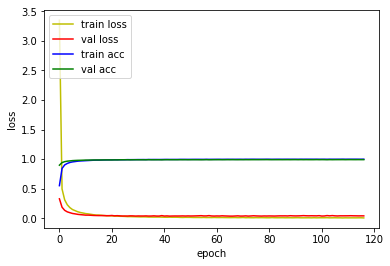

10000/10000 [==============================] - 1s 103us/sample - loss: 0.0267 - acc: 0.9921
Loss: 0.026718628816661476 Accuracy: 0.9921

Train on 40200 samples, validate on 19800 samples
Epoch 1/500
40000/40200 [============================>.] - ETA: 0s - loss: 3.2240 - acc: 0.5584
Epoch 00001: val_loss improved from inf to 0.33497, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/001-0.3350.hdf5
40200/40200 [==============================] - 8s 198us/sample - loss: 3.2106 - acc: 0.5596 - val_loss: 0.3350 - val_acc: 0.9013
Epoch 2/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.4776 - acc: 0.8455
Epoch 00002: val_loss improved from 0.33497 to 0.17560, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/002-0.1756.hdf5
40200/40200 [==============================] - 7s 163us/sample - loss: 0.4774 - acc: 0.8455 - val_loss: 0.1756 - val_acc: 0.9468
Epoch 3/500
40000/40200 [============================

Epoch 24/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0301 - acc: 0.9907
Epoch 00024: val_loss improved from 0.03906 to 0.03813, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/024-0.0381.hdf5
40200/40200 [==============================] - 7s 163us/sample - loss: 0.0301 - acc: 0.9907 - val_loss: 0.0381 - val_acc: 0.9888
Epoch 25/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0285 - acc: 0.9899
Epoch 00025: val_loss improved from 0.03813 to 0.03729, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/025-0.0373.hdf5
40200/40200 [==============================] - 6s 143us/sample - loss: 0.0285 - acc: 0.9899 - val_loss: 0.0373 - val_acc: 0.9886
Epoch 26/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0268 - acc: 0.9910
Epoch 00026: val_loss did not improve from 0.03729
40200/40200 [==============================] - 6s 143us/sample - loss: 0.0268 - acc: 0

Epoch 53/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0104 - acc: 0.9967
Epoch 00053: val_loss did not improve from 0.03569
40200/40200 [==============================] - 6s 142us/sample - loss: 0.0105 - acc: 0.9965 - val_loss: 0.0395 - val_acc: 0.9906
Epoch 54/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0117 - acc: 0.9961
Epoch 00054: val_loss did not improve from 0.03569
40200/40200 [==============================] - 6s 143us/sample - loss: 0.0117 - acc: 0.9962 - val_loss: 0.0390 - val_acc: 0.9903
Epoch 55/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0098 - acc: 0.9970
Epoch 00055: val_loss did not improve from 0.03569
40200/40200 [==============================] - 6s 143us/sample - loss: 0.0098 - acc: 0.9970 - val_loss: 0.0389 - val_acc: 0.9911
Epoch 56/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0094 - acc: 0.9967
Epoch 00056: val_loss did not improve from 0.03569
40200/40200 [========

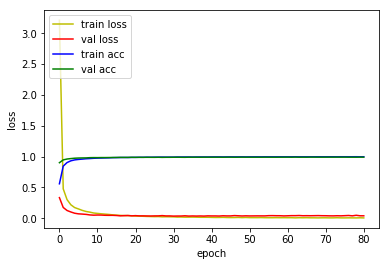

10000/10000 [==============================] - 1s 128us/sample - loss: 0.0272 - acc: 0.9917
Loss: 0.02717794110944369 Accuracy: 0.9917

Train on 40200 samples, validate on 19800 samples
Epoch 1/500
40192/40200 [============================>.] - ETA: 0s - loss: 1.2112 - acc: 0.7194
Epoch 00001: val_loss improved from inf to 0.17966, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_5_conv_checkpoint/001-0.1797.hdf5
40200/40200 [==============================] - 10s 253us/sample - loss: 1.2110 - acc: 0.7195 - val_loss: 0.1797 - val_acc: 0.9446
Epoch 2/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.2338 - acc: 0.9294
Epoch 00002: val_loss improved from 0.17966 to 0.10921, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_050_DO_5_conv_checkpoint/002-0.1092.hdf5
40200/40200 [==============================] - 7s 179us/sample - loss: 0.2336 - acc: 0.9294 - val_loss: 0.1092 - val_acc: 0.9655
Epoch 3/500
40128/40200 [============================

Epoch 26/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0103 - acc: 0.9971
Epoch 00026: val_loss did not improve from 0.04144
40200/40200 [==============================] - 7s 182us/sample - loss: 0.0104 - acc: 0.9971 - val_loss: 0.0452 - val_acc: 0.9894
Epoch 27/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0100 - acc: 0.9970
Epoch 00027: val_loss did not improve from 0.04144
40200/40200 [==============================] - 7s 183us/sample - loss: 0.0100 - acc: 0.9970 - val_loss: 0.0471 - val_acc: 0.9893
Epoch 28/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0087 - acc: 0.9973
Epoch 00028: val_loss did not improve from 0.04144
40200/40200 [==============================] - 7s 178us/sample - loss: 0.0087 - acc: 0.9973 - val_loss: 0.0454 - val_acc: 0.9906
Epoch 29/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0080 - acc: 0.9975
Epoch 00029: val_loss did not improve from 0.04144
40200/40200 [========

Epoch 56/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 0.9996
Epoch 00056: val_loss did not improve from 0.04144
40200/40200 [==============================] - 7s 177us/sample - loss: 0.0015 - acc: 0.9996 - val_loss: 0.0536 - val_acc: 0.9909
Epoch 57/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0045 - acc: 0.9986
Epoch 00057: val_loss did not improve from 0.04144
40200/40200 [==============================] - 7s 167us/sample - loss: 0.0046 - acc: 0.9986 - val_loss: 0.0611 - val_acc: 0.9892
Epoch 58/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0038 - acc: 0.9988
Epoch 00058: val_loss did not improve from 0.04144
40200/40200 [==============================] - 7s 179us/sample - loss: 0.0038 - acc: 0.9988 - val_loss: 0.0572 - val_acc: 0.9898
Epoch 59/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0041 - acc: 0.9984
Epoch 00059: val_loss did not improve from 0.04144
40200/40200 [========

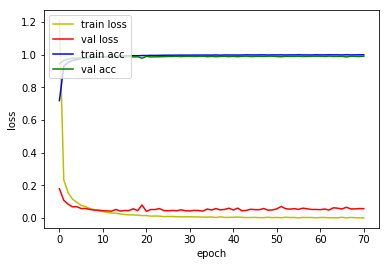

10000/10000 [==============================] - 1s 131us/sample - loss: 0.0339 - acc: 0.9901
Loss: 0.033898328276310716 Accuracy: 0.9901



In [11]:
for i in range(1, 6):
    base = 'vis_2D_CNN_custom_ch_32_DO_050_DO'
    model_name = base+'_{}_conv'.format(i)
    model = build_2d_cnn_custom_ch_32_DO(conv_num=i)
#         model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=50)
    hist = model.fit(x_train, y_train, batch_size=64, epochs=500, 
                     validation_data=[x_val, y_val], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model.save(model_path+'000_last.hdf5')
    del(model)

    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [12]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = 'vis_2D_CNN_custom_ch_32_DO_050_DO'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(1, 6):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test, y_test)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


vis_2D_CNN_custom_ch_32_DO_050_DO_1_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_15 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)             

10000/10000 [==============================] - 1s 145us/sample - loss: 0.0339 - acc: 0.9901
Loss: 0.033898328276310716 Accuracy: 0.9901


In [13]:
for i in range(1, 6):
    model_name = base+'_{}_conv'.format(i)
    print()
    print(model_name, 'Model')
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + '000_last.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)


vis_2D_CNN_custom_ch_32_DO_050_DO_1_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_15 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)             

10000/10000 [==============================] - 2s 159us/sample - loss: 0.0491 - acc: 0.9915
Loss: 0.04913012339402099 Accuracy: 0.9915
